# Исследование информации о продажах компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

* **name** — название игры
* **platform** — платформа
* **year_of_release** — год выпуска
* **genre** — жанр игры
* **na_sales** — продажи в Северной Америке (миллионы проданных копий)
* **eu_sales** — продажи в Европе (миллионы проданных копий)
* **jp_sales** — продажи в Японии (миллионы проданных копий)
* **other_sales** — продажи в других странах (миллионы проданных копий)
* **critic_score** — оценка критиков (максимум 100)
* **user_score** — оценка пользователей (максимум 10)
* **rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<div style="border:solid #9FEDD7 4px; padding: 40px">

**Цель исследования**
* Нахождение закономерностей, определяющих успешность игр для планирования рекламной компании

**Ход исследования**

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных, проверка данных на ошибки и аномалии.
 
Таким образом, исследование пройдёт в несколько этапов:
* Обзор данных.
* Предобработка данных.
* Проведение исследовательского анализа данных
* Составлени портрета пользователя каждого региона
* Проверка гипотез

### 1. Откройте файл с данными и изучите общую информацию. 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
try:
    data=pd.read_csv('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('games.csv',sep=',')
    
data.info()
display(data.head())

#проверка на явные дубликаты
#print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2. Предобработка данных

<div style="border:solid #9FEDD7 4px; padding: 40px">
    
**Переименование столбцов и изменение типов данных**:
    
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы.    
*Опишите, в каких столбцах заменили тип данных и почему;


In [31]:
data.columns=data.columns.str.lower()
#только целые года, но особые методы работы с датой нам не понадобятся
data['year_of_release']=data['year_of_release'].astype('Int64')

display(data.head())
#проверяем, что типы данных изменились
data.info()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


В данном блоке был изменен типы данных year_of_release на Int64 для удобства работы. Использовать тип данных, относящийся к дате не имеет смысла, как мне показалось, в данном случае, т.к. не планируется использовать специальные методы DateTime. Далее в программе будет обработан также столбец с user_score.


<div style="border:solid #9FEDD7 4px; padding: 40px">
    
**Работа с пропусками**:

* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [32]:
#посмотрим количество пропусков в данных
#data.info()
#посмотрим общий размер данных
#data.shape[0]


#суммарные продажи в регионах
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

#предполагаю, что кто-то уже попытался заполнить пропуски tbd.Нам такое значение неудобно обрабатывать, смысловой нагрузки в нем нет
#лучше очистить все tbd и обработать с другими пропусками user_score
#display(data.loc[data['user_score']=='tbd'])
data.loc[data['user_score']=='tbd','user_score']=float('nan')

#игры без названия
data.loc[data['name'].isna()]
data['name']=data['name'].fillna('unknown')

#игры без жанра
data=data.loc[data['genre'].isna()==False]

#игры с пропусками в годах выхода
year_nan=data.loc[data['year_of_release'].isna()]

#в некоторых названиях явно указан год, можно распарсить и вытащить
years=['2004', '2006', '2003', '2002','2013', '2005', '2011', '2008', '2007']
def name_slice(name):
    #if [s for s in name[-5:] if s in '1234567890']: #чтобы посмотреть все варианты с окончаниями, включающими цифры
    if [s for s in years if s in name[-4:]]:#из полученных просто вручную сформировала список годов
        try:
            return name[-4:]
        except:
            pass

data['year'] = pd.to_numeric(year_nan['name'].
                             apply(name_slice).astype(str)
                             .str.replace(r"[^\d\-]", "", regex=True), errors="coerce").astype('Int64')

data['year_of_release']=data['year_of_release'].fillna(data['year'])
data=data.drop(labels=['year'],axis=1)

#остальные пропуски года заполнить все же не выйдет, т.к. информацию о годе выхода нам не получить
#заполнять каким-то наиболее частым значением, например, мне кажется неразумно
data=data.loc[data['year_of_release'].isna()==False]
data['year_of_release'].astype('int')

#пропуски в рейтингах
# data.loc[data['critic_score'].isna()].count()
# data.loc[data['user_score'].isna()].count()


#data['total_sales'].astype('float')

#пропуски в рейтинге и оценке пользователей можно было бы заполнить, например, самым частым значением по этому жанру, однако у нас этих пропусков 40%
#от общего количества данных, а это очень повредит проверке гипотез на основе таких данных.

#display(data.groupby(by='genre')['rating'].value_counts())
data['rating']=data['rating'].fillna('UNK')
data['critic_score']=data['critic_score'].fillna(-1)
data['user_score']=data['user_score'].fillna(-1)
data['user_score']=data['user_score'].astype('float')
data['critic_score']=data['critic_score'].astype('float')
data_new=data.copy()
data_old=data.copy()
#data_new.info()




* Для категориальных признаков (**name**, **year_of_release**,**raiting**) :
    
    * name заполнила значением "unknown", т.к. какие-то данные могут пригодиться в дальнейшей работе, а само значение имени не принципиально.
    * часть year_of_relese заполнила из названий игр (где были явно указаны), остальные заполнить каким-то иным значением не выйдет - удаляем
    * пропуски в rating заполнить не выйдет, т.к. найти какую-то зависимость по его расстановке не видится возможным. заполним значением UNK


* Для количественных признаков (**user_score**, **critic_score**):
    * заполнить медианным значением по жанру и году мне показалось не вполне логичным, т.к. все-таки успех игры зависит не от года и жанра, а от каких-то более глубоких особенностей, данных о которых у нас нет. tbd означает, что рейтинг будет добавлен, в данном случае я считаю, что можно рассматривать это значение наряду с пропусками. Пропуски в данных категориях были заменены значением "-1"
    
    
Причинами появления пропусков в значениях обычно являются ошибки выгрузки файла или какая-то человеческая ошибка при переносе информации в базу, также, возможно в данные были заведомо неполными, какими их предпочел передать заказчик.



In [8]:
# Посмотрим, что у нас осталось
temp = data_new.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  Int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     16459 non-null  float64
 9   user_score       16459 non-null  float64
 10  rating           16459 non-null  object 
 11  total_sales      16459 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

### 3. Исследовательский анализ данных

<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?


In [9]:
#1
import numpy as np
import matplotlib.pyplot as plt
count_of_games=data_new.pivot_table(index='year_of_release',values='name',aggfunc='count')
count_of_games.columns=['name']
#display(count_of_games.sort_values(by='year_of_release',ascending=False))
#count_of_games.reset_index
#display(pd.DataFrame(count_of_games.sort_values(by='year_of_release',ascending=False)).style.background_gradient('magma'))


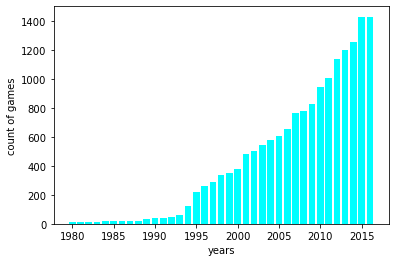

In [10]:
plt.bar(count_of_games.index,count_of_games['name'].sort_values(),color='cyan')
plt.xlabel('years')
plt.ylabel('count of games')
plt.show()



Количество выпущенных в различные годы игр отражено на гистограмме. Важны данные свежее 1995 года, т.к. в остальные года выпущено слишком мало игр, для того, чтобы проводить по ним аналитику.


<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 


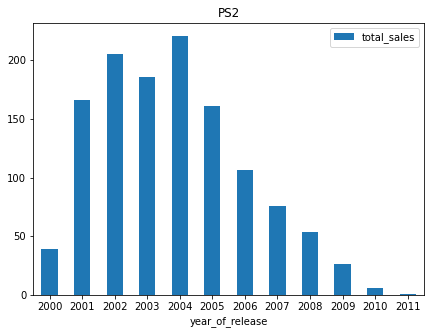

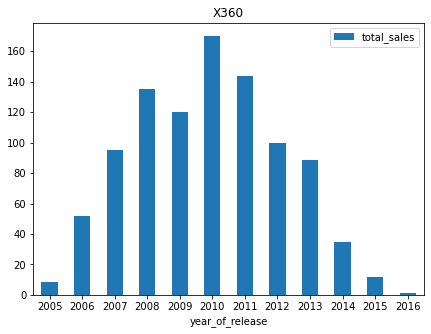

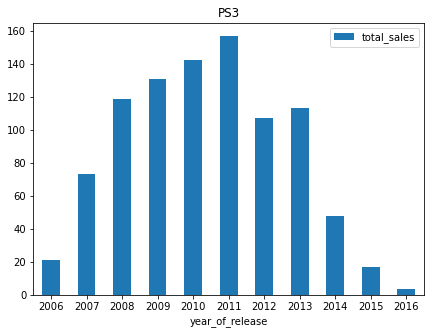

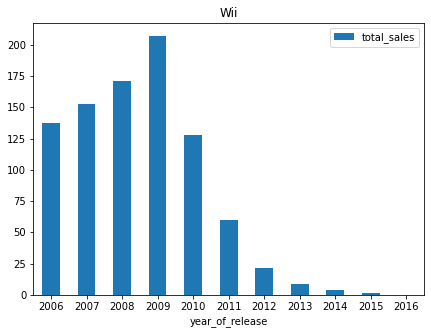

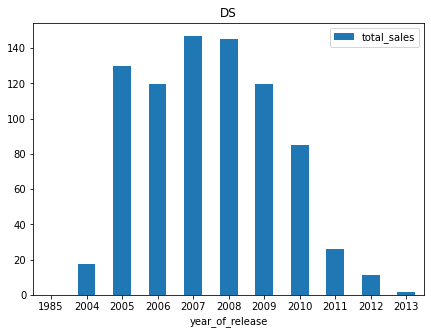

In [11]:
#2
popular_platforms=data_new.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
#наидолее популярные продажи по платформам:
popular_names_of_platforms=popular_platforms.pivot_table(index=['platform'],values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
#display(popular_names_of_platforms.style.background_gradient('coolwarm'))
popular_names_of_platforms=popular_names_of_platforms.head(5)
popular_platforms=popular_platforms.reset_index()

mean_years_of_life=0
for x in popular_names_of_platforms.index:
    fig, ax = plt.subplots()
    fig.set_figwidth(7)   
    fig.set_figheight(5)
    popular_platforms.loc[popular_platforms['platform']==x].sort_values(by='year_of_release').plot.bar(x='year_of_release', y='total_sales', rot=0,ax=ax)
    mean_years_of_life+=popular_platforms.loc[popular_platforms['platform']==x]['year_of_release'].count()
    ax.set_title(x)



На визуализации отображены пять лидирующих по продажам платформ с распределением количества приобритенных копий игр по годам. Видим, что у платформы DS наблюдается артефакт - выпуск 1985г. под данную платформу, однако в 1985 году этой платформы еще не существовало.

<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* За какой характерный срок появляются новые и исчезают старые платформы?

In [33]:

mean_years_of_life=mean_years_of_life/5

#print("Средняя продолжительность жизни платформы:",mean_years_of_life)




Средняя продолжительность жизни платформы: 11.4

<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.


In [13]:

#1
#какой период считать актуальным
# for x in popular_platforms['platform'].unique():
#     ax=popular_platforms.loc[popular_platforms['platform']==x].sort_values(by='year_of_release').plot.bar(x='year_of_release', y='total_sales', rot=0)
#     ax.set_title(x)    


Будем считать актуальным период, начиная с 2012 года. Все популярные платформы, которые будут использоваться в 2017 году как раз войдут в этот период

<div style="border:solid #9FEDD7 4px; padding: 40px">

* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


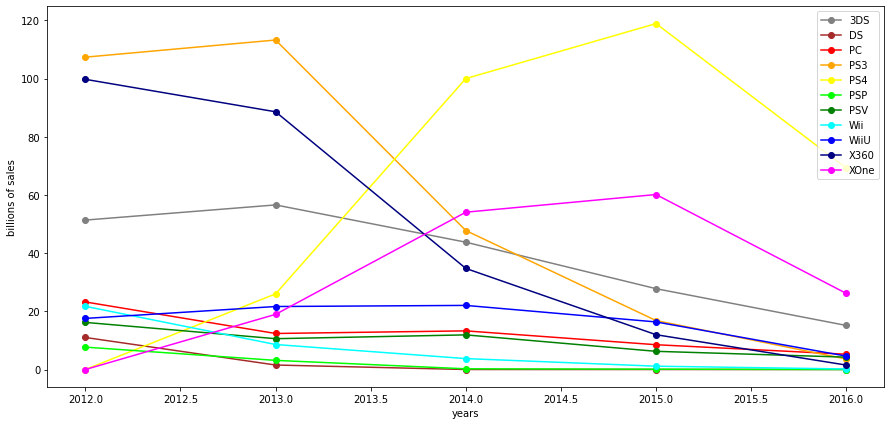

In [14]:
#2
colors = ['black', 'gray', 'brown', 'red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'navy', 'magenta', 'purple', 'violet', 'pink']
popular_after_2012=popular_platforms.loc[popular_platforms['year_of_release']>=2012].sort_values(by=['platform','year_of_release'])
#display(popular_after_2012)
plotting_years=[2012,2013,2014,2015,2016]
plotting_data={}
for x in popular_after_2012['platform'].unique():
    plotting_data[x]=[]
    for y in plotting_years:
        try:
            plotting_data[x].append(*popular_after_2012.loc[(popular_after_2012['platform']==x)&(popular_after_2012['year_of_release']==y),'total_sales'])
        except:
            plotting_data[x].append(0)
#print(plotting_data)


fig, ax = plt.subplots()
fig.set_figwidth(15)   
fig.set_figheight(7)

i=0
for x in plotting_data.keys():
    i+=1
    ax.plot(plotting_years, plotting_data[x],color=colors[i],marker='o', label=x)

ax.legend()
ax.set_xlabel("years")
ax.set_ylabel("billions of sales") 

plt.show()



* Наиболее популярными платформами будем считать PS4,xOne и 3DS. Сказано, что данные в 2016 году могут быть неполными. В таком случае рост или снижение продаж будем анализировать вплоть до 2015г. На этом промежутке PS4 и XOne набирают свою популярность, а 3DS теряет

<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* Постройте график боксплот по глобальным продажам игр в разбивке по платформам. Опишите результат.


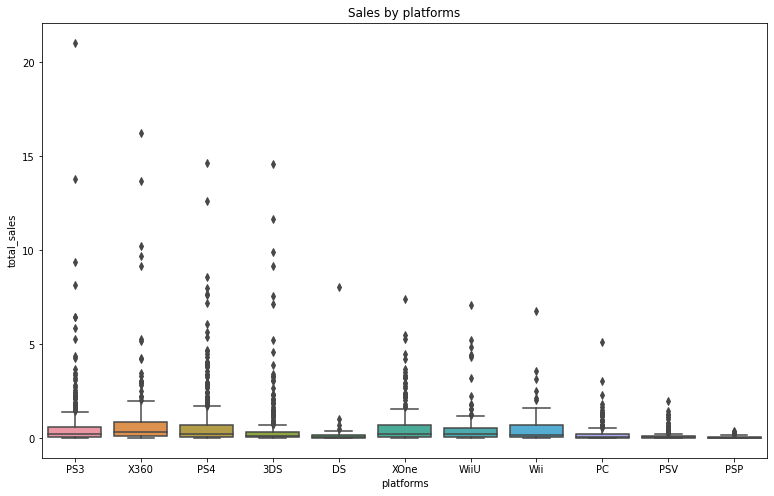

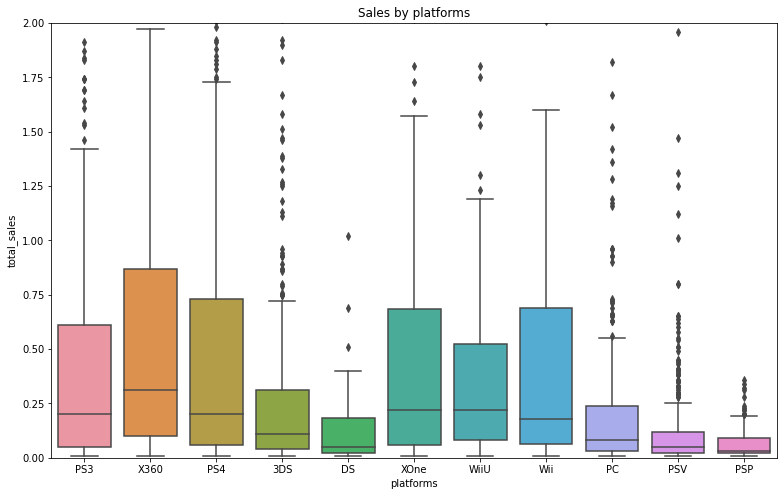

In [15]:
import seaborn as sns
data_temp, y = data_new[data_new.year_of_release>=2012].copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Sales by platforms', xlabel = 'platforms', ylabel = 'total_sales'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Sales by platforms', xlabel = 'platforms', ylabel = 'total_sales', ylim=(0, 2)))
plt.show()

Как видно из графика - наибольший размах по продажам у PS3,PS4,X360. Во первых это говорит о том, что на данных платформах были выпущены как очень продаваемые игры, так и те, которые не особо пользовались популярностью. Наибольшая медиана у PS4 - на уровне порядка 70млн копий, что говорит о том, что в актуальном периоде - PS4 самая успешная платформа для реализации игр. Помимо перечисленных платформ 3DS с небольшим размахом и медианой, близкой к медиане PS3. Что означает, что игры, вышедшие на этой платформе не были особо провальными. Остальные платформы так или иначе, либо уже потеряли свою актуальность, либо в скором времени ее потеряют.


<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


User score and total sales correlation for PS4: -0.032
Critic score and total sales correlation for PS4: 0.35


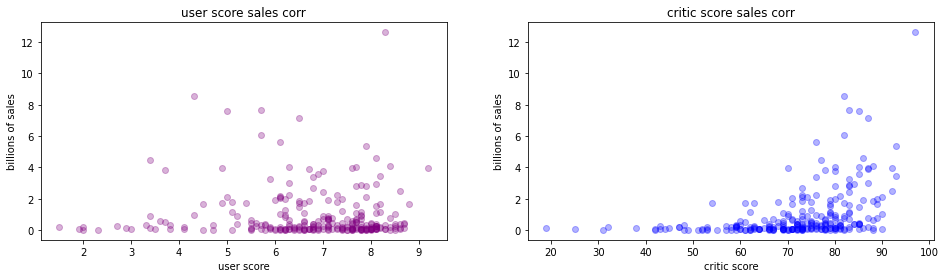

In [28]:
#2
data_new=data_new.loc[data_new['year_of_release']>=2012]
fig2, axs = plt.subplots(1,2)
fig2.set_figwidth(16)   
fig2.set_figheight(4)

#Рассмотрим в качестве примера PS4
#display(data_new.query('platform == "PS4"').head(10))

user_score_total_sales_corr=data_new.loc[(data_new['user_score']>=0) & (data_new['platform'] == "PS4")]
critic_score_total_sales_corr=data_new.loc[(data_new['critic_score']>=0) & (data_new['platform'] == "PS4")]

axs[0].scatter(user_score_total_sales_corr['user_score'], user_score_total_sales_corr['total_sales'],alpha=0.3,c='purple')
axs[0].set_title('user score sales corr')
axs[0].set_ylabel('billions of sales')
axs[0].set_xlabel('user score')


axs[1].scatter(critic_score_total_sales_corr['critic_score'], critic_score_total_sales_corr['total_sales'],alpha=0.3,c='blue')
axs[1].set_title('critic score sales corr')
axs[1].set_ylabel('billions of sales')
axs[1].set_xlabel('critic score')

print("User score and total sales correlation for PS4:",np.round(user_score_total_sales_corr['user_score'].corr(user_score_total_sales_corr['total_sales']),3))
print("Critic score and total sales correlation for PS4:",np.round(user_score_total_sales_corr['critic_score'].corr(user_score_total_sales_corr['total_sales']),3))

Между отзывами пользователей и продажами практически отсутсвует корреляция, в тоже время между отзывами критиков и продажами она слабо-положительная. Таким образом если отзывы критиков положительные, то и продажи игры будут возрастать.

<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* Соотнесите выводы с продажами игр на других платформах.


User score and total sales correlation for  PS3 -0.005
Critic score and total sales correlation for  PS3 0.201 

User score and total sales correlation for  X360 0.006
Critic score and total sales correlation for  X360 0.255 

User score and total sales correlation for  3DS 0.198
Critic score and total sales correlation for  3DS 0.25 

User score and total sales correlation for  DS 0.883
Critic score and total sales correlation for  DS 0.875 

User score and total sales correlation for  XOne -0.069
Critic score and total sales correlation for  XOne 0.334 



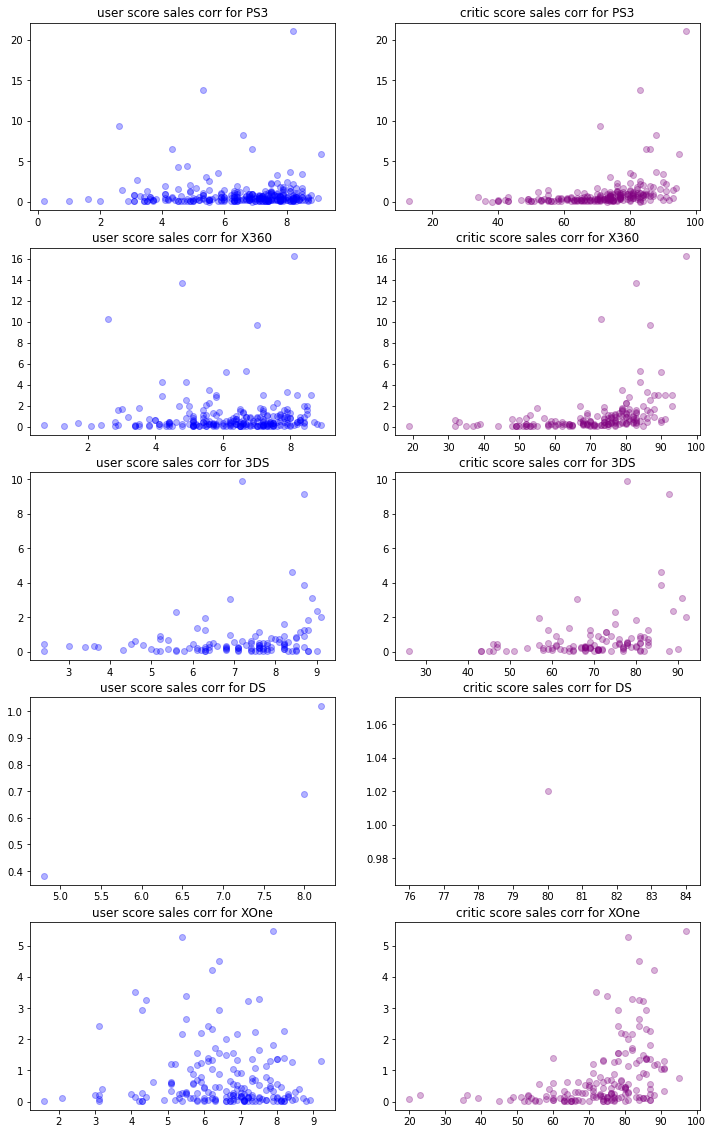

In [18]:
#1

fig1,axs1=plt.subplots(5,2)
fig1.set_figwidth(12)   
fig1.set_figheight(20)
i=0
j=0
for x in (data_new['platform'].unique()[:7]):
    if (x!='PS4'):
        user_score_total_sales_corr=data_new.loc[(data_new['user_score']>=0) & (data_new['platform'] == x)]
        critic_score_total_sales_corr=data_new.loc[(data_new['critic_score']>=0) & (data_new['platform'] == x)]
        print("User score and total sales correlation for ",x,np.round(user_score_total_sales_corr['user_score'].corr(user_score_total_sales_corr['total_sales']),3))
        print("Critic score and total sales correlation for ",x,np.round(user_score_total_sales_corr['critic_score'].corr(user_score_total_sales_corr['total_sales']),3),'\n')
    
        axs1[i][j].scatter(user_score_total_sales_corr['user_score'], user_score_total_sales_corr['total_sales'],alpha=0.3,c='blue')
        axs1[i][j].set_title('user score sales corr for '+x)
    
        j+=1
        axs1[i][j].scatter(critic_score_total_sales_corr['critic_score'], critic_score_total_sales_corr['total_sales'],alpha=0.3,c='purple')
        axs1[i][j].set_title('critic score sales corr for '+x)
        if j==1:
            i+=1
            j=0
        if i==5:
            break
        
#display(data_new.loc[(data_new['user_score']>=0) & (data_new['platform'] == 'DS')])
#display(data_new.loc[(data_new['critic_score']>=0) & (data_new['platform'] == 'DS')])

Судя по анализу других платформ наблюдается схожая тенденция: отсутствие взаимосвязи для отзывов пользователей и продаж и слабо-положительная корреляция отзывов критиков и продаж. Вывод корреляции относительно платформы DS не является показательным, т.к. количество игр, остающихся после фильтрации данных, недостаточно для оценки корреляции.
    

<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

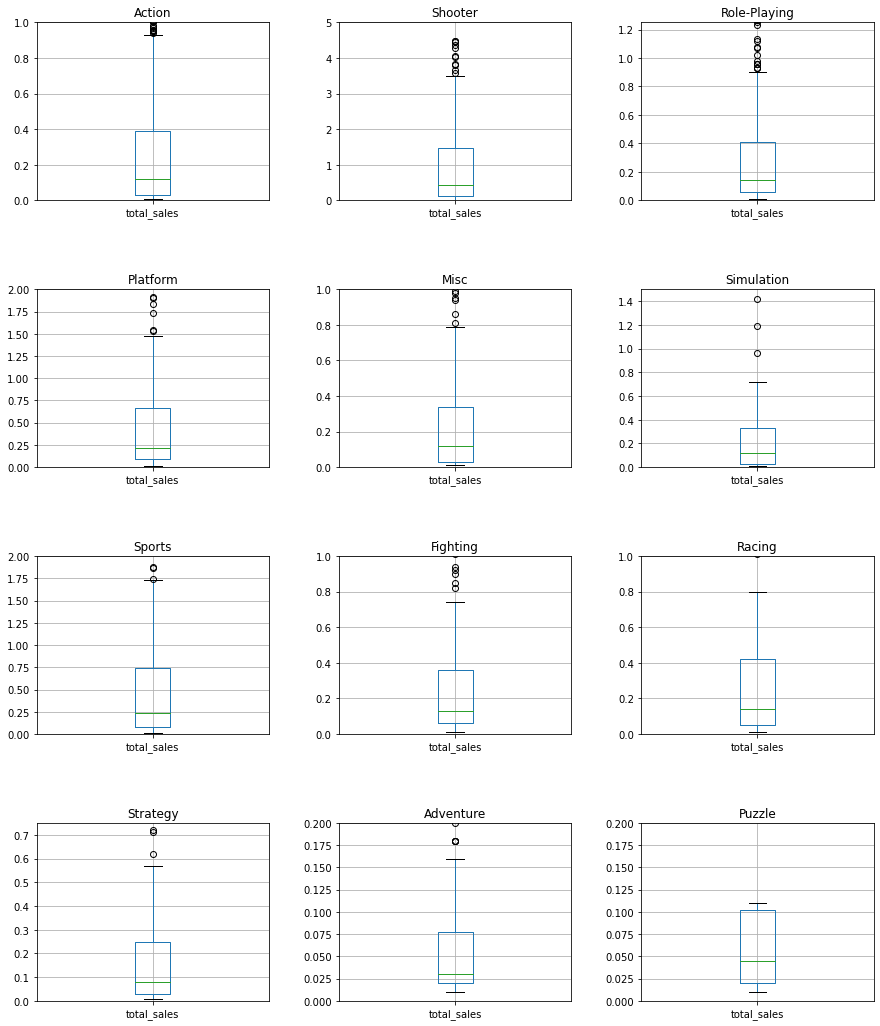

[('Adventure', 0.03), ('Puzzle', 0.045), ('Strategy', 0.08), ('Action', 0.12), ('Misc', 0.12), ('Simulation', 0.12), ('Fighting', 0.13), ('Racing', 0.13999999999999999), ('Role-Playing', 0.14), ('Platform', 0.21), ('Sports', 0.24000000000000002), ('Shooter', 0.44)]


In [20]:
fig1,axs1=plt.subplots(4,3)
fig1.set_figwidth(15)   
fig1.set_figheight(18)

i=0
j=0
median_sales_by_genre={}
max_limits=[[1,5,1.25],[2,1,1.5],[2,1,1],[0.75,0.2,0.2]]
for x in (data_new['genre'].unique()):
    data_new[data_new['genre']==x].boxplot('total_sales',ax=axs1[i][j])
    axs1[i][j].set_title(x)
    axs1[i][j].set_ylim(0,max_limits[i][j])
    median_sales_by_genre[x]=data_new.loc[data_new['genre']==x,'total_sales'].median()
    j+=1
    if j==3:
        i+=1
        j=0
    if i==4:
        break   
        
fig1.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

sorted_median = sorted(median_sales_by_genre.items(), key=lambda kv: kv[1])
print(sorted_median)

Самые **популярные** жанры - Shooter, Sports, Platform. Самые **непопулярные** - Strategy, Puzzle и Strategy

### 4. Портрет пользователя каждого региона

<div style="border:solid #9FEDD7 4px; padding: 40px">

* Самые популярные платформы для пользователя каждого региона (топ-5). Опишите различия в долях продаж.


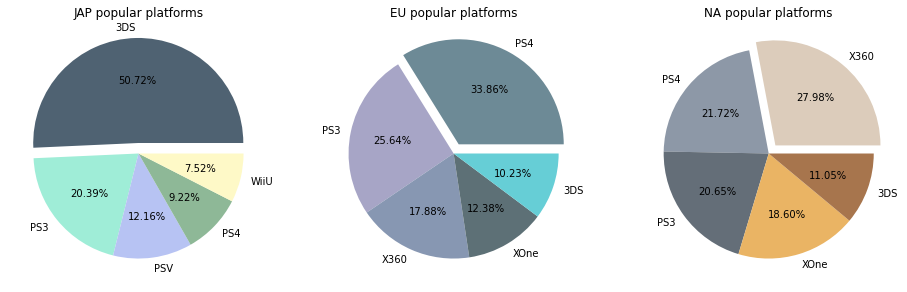

In [21]:
#1
jp_popular_platforms=data_old.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
eu_popular_platforms=data_old.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
na_popular_platforms=data_old.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)


fig, ax = plt.subplots(1,3)
fig.set_figwidth(16)   
fig.set_figheight(7) 
explode = (0.1, 0, 0, 0,0)
colors = [['#4F6272', '#9FEDD7', '#B7C3F3', '#8EB897','#FEF9C7'],['#6D8A96','#A7A5C6','#8797B2','#5D7076','#66CED6'],['#DCCCBB','#8D98A7','#646E78','#EAB464','#A7754D']]
ax[0].pie(jp_popular_platforms['jp_sales'],labels=jp_popular_platforms.index,colors=colors[0],explode=explode, autopct='%1.2f%%')
ax[0].set_title('JAP popular platforms')
ax[1].pie(eu_popular_platforms['eu_sales'],labels=eu_popular_platforms.index,colors=colors[1],explode=explode, autopct='%1.2f%%')
ax[1].set_title('EU popular platforms')
ax[2].pie(na_popular_platforms['na_sales'],labels=na_popular_platforms.index,colors=colors[2],explode=explode, autopct='%1.2f%%')
ax[2].set_title('NA popular platforms')
plt.show()




Для региона JAP популярной платформой является 3DS,для EU PS4, а для NA X360


<div style="border:solid #9FEDD7 4px; padding: 40px">

* Самые популярные жанры для пользователя каждого региона (топ-5). Поясните разницу.


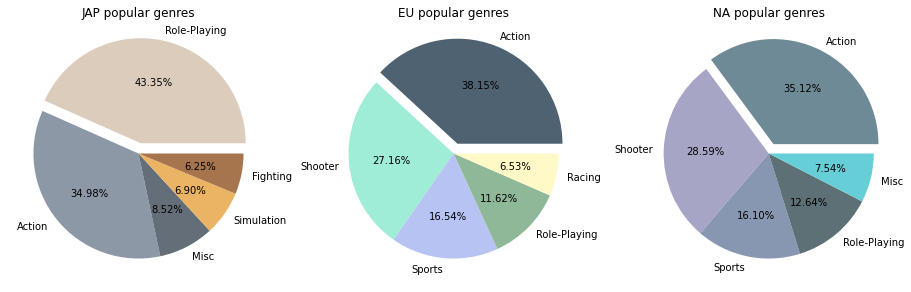

In [22]:
#2
jp_popular_genres=data_old.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5)
eu_popular_genres=data_old.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5)
na_popular_genres=data_old.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5)

fig1, axs = plt.subplots(1,3)
fig1.set_figwidth(16)   
fig1.set_figheight(7) 
explode = (0.1, 0, 0, 0,0)
colors = [['#4F6272', '#9FEDD7', '#B7C3F3', '#8EB897','#FEF9C7'],['#6D8A96','#A7A5C6','#8797B2','#5D7076','#66CED6'],['#DCCCBB','#8D98A7','#646E78','#EAB464','#A7754D']]
axs[0].pie(jp_popular_genres['jp_sales'],labels=jp_popular_genres.index,colors=colors[2],explode=explode, autopct='%1.2f%%')
axs[0].set_title('JAP popular genres')
axs[1].pie(eu_popular_genres['eu_sales'],labels=eu_popular_genres.index,colors=colors[0],explode=explode, autopct='%1.2f%%')
axs[1].set_title('EU popular genres')
axs[2].pie(na_popular_genres['na_sales'],labels=na_popular_genres.index,colors=colors[1],explode=explode, autopct='%1.2f%%')
axs[2].set_title('NA popular genres')
plt.show()

Для региона JAP популярным жанром является Role-Playing,для EU и NA Action


<div style="border:solid #9FEDD7 4px; padding: 40px">

* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

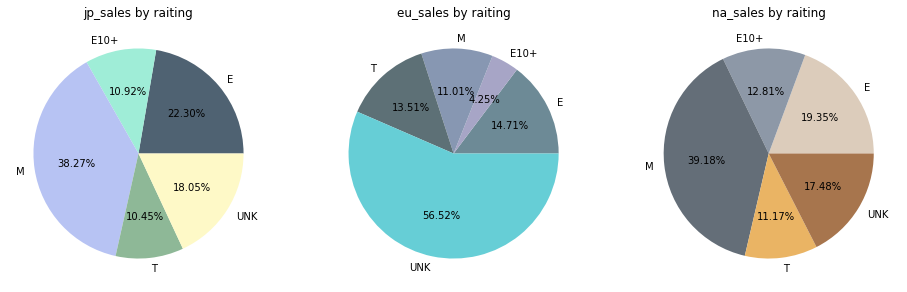

In [23]:

#3
# print(data_new['rating'].unique())
# print(data['rating'].unique())
rating_popular_by_region=data_old.pivot_table(index='rating',values=['jp_sales','eu_sales','na_sales'],aggfunc='sum')
rating_popular_by_region.columns=['jp_sales','eu_sales','na_sales']
#display(rating_popular_by_region)
fig2, axs1 = plt.subplots(1,3)
fig2.set_figwidth(16)   
fig2.set_figheight(7)
colors = [['#4F6272', '#9FEDD7', '#B7C3F3', '#8EB897','#FEF9C7'],['#6D8A96','#A7A5C6','#8797B2','#5D7076','#66CED6'],['#DCCCBB','#8D98A7','#646E78','#EAB464','#A7754D']]
i=0
for x in rating_popular_by_region.columns:
    axs1[i].pie(rating_popular_by_region[x],labels=rating_popular_by_region.index,colors=colors[i], autopct='%1.2f%%')
    axs1[i].set_title(x+' by raiting')
    i+=1
plt.show()

Игры с рейтингом М наиболее популярны в JAP и NA, в EU большая часть наших данных непомечена, т.к. такая система рейтинга используется только на Американском рынке

### 5. Проверка гипотез

<div style="border:solid #9FEDD7 4px; padding: 40px">
    
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


* Нулевая гипотеза - Средние двух СВ равны.


* Альтернативная гипотеза - Cредние двух СВ не равны.

In [24]:
#1
import numpy as np
from scipy import stats as st
sample_1=data_new.loc[data_new['platform']=='XOne','user_score']
#print(sample_1.shape)
sample_2=data_new.loc[data_new['platform']=='PC','user_score']
#print(sample_2.shape)


alpha = 0.01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу",'\n')
else:
    print("Не получилось отвергнуть нулевую гипотезу",'\n') 
    


p-значение: 0.05619765758385681
Не получилось отвергнуть нулевую гипотезу 



In [25]:
print("Mean user score for XOne",np.round(data_new.loc[data_new['platform']=='XOne','user_score'].mean(),3))
print("Mean user score for PC",np.round(data_new.loc[data_new['platform']=='PC','user_score'].mean(),3))

Mean user score for XOne 4.542
Mean user score for PC 5.121


<div style="border:solid #9FEDD7 4px; padding: 40px">

* Средние пользовательские рейтинги жанров Action и Sports разные.

* Нулевая гипотеза - Средние двух СВ равны.


* Альтернативная гипотеза - Cредние двух СВ не равны.

In [26]:

#2
sample_1=data_new.loc[data_new['genre']=='Action','user_score']
#print(sample_1.shape)
sample_2=data_new.loc[data_new['genre']=='Sports','user_score']
#print(sample_2.shape)


alpha = 0.01

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0020018209559324713
Отвергаем нулевую гипотезу


In [27]:
print("Mean user score for Action",np.round(data_new.loc[data_new['genre']=='Action','user_score'].mean(),3))
print("Mean user score for Sports",np.round(data_new.loc[data_new['genre']=='Sports','user_score'].mean(),3))

Mean user score for Action 2.969
Mean user score for Sports 3.697



По результатам применения статистического критерия получили вывод, что не получилось опровергнуть, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, но при этом получилось отвергнуть гипотезу,что средние пользовательские рейтинги жанров Action и Sports одинаковые. 
    

### 6. Общий вывод

  
Задачей исследования было нахождение закономерностей, определяющих успешность игр для планирования рекламной компании

В ходе исследования были изучены предоставленные данные, произведена их предобработка (произведена проверка на пропуски и дубликаты в данных, найден актуальный период для исследования), для были построены визуализации продаж по годам для различных платформ, показывающие распределение данных, а также выведены диаграммы размаха продаж для этих платформ. Затем было рассмотрено влияние отдельно взятых параметров на успех игры. По итогу рассмотрения получены и визуализированы следующие выводы этой взаимосвязи:

* **пользовательская оценка**: не влияет на успех игры
* **оценка критиков**: чем выше оценка критиков, тем больше будет продаж
* **платформа**: в качестве платформы имеет смысл рассматривать наиболее популярные - PS3,PS4, 3DS.

* при выстраивании рекламной компании стоит ориентироваться на конечного потребителя в сегментированном рынке:
    
    
* **Портрет пользователя региона JAP:**
    * популярная платформа:3DS
    * популярный жанр: Role-Playing
    * популярный рейтинг: M
    
    
* **Портрет пользователя региона EU:**
    * популярная платформа:PS4
    * популярный жанр: Action
    * популярный рейтинг: не влияет на популярность
    
    
* **Портрет пользователя региона NA:**
    * популярная платформа:X360
    * популярный жанр: Action
    * популярный рейтинг: M
    
__________________________
Рекомендации: При планировании рекламной компании стоит ориентироваться на такие параметры как регион проведения кампании, популярные жанры и платформы. Наиболее прибыльными жанрами являются Shooter, Sports, Platform, хоть они и не являются самыми популярными для отдельных регионов. Высокие оценки пользователей практически не влияют на общие продажи игр, а оценки критиков, в целом, средне-положительно коррелируют с продажами.
